In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime

In [12]:
start = datetime.datetime(2004,12,14)#26 day before start year for make indicator
end = datetime.datetime(2010,1,3)
st=start.strftime("%Y")
ed=end.strftime("%Y")

In [139]:
stock = pd.read_csv('stock.csv')
df = web.DataReader(stock,'yahoo',start,end)
# df = df.drop(['Open','High','Low','Volume','Adj Close'],axis=1)
# pd.set_option('display.max_columns', None)

In [140]:
df['MA'] = df['Close'].rolling(15).mean()
df = df.iloc[14:]

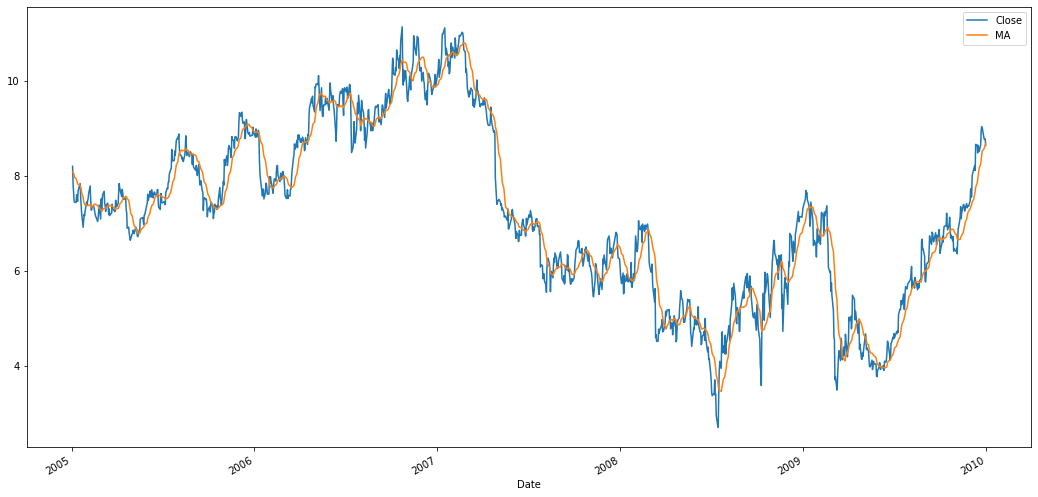

In [141]:
df[['Close','MA']].plot(figsize = (18,9))

In [142]:

df.loc[(df['Close'] > df['MA']) &
((df['Close'] > df['Close'].shift(1)) | (df['MA'] > df['MA'].shift(1))) &
((df['Close'] > df['Close'].shift(2)) | (df['MA'] > df['MA'].shift(2))) &
((df['Close'] > df['Close'].shift(3)) | (df['MA'] > df['MA'].shift(3))) &
((df['Close'] > df['Close'].shift(4)) | (df['MA'] > df['MA'].shift(4))) &
((df['Close'] > df['Close'].shift(5)) | (df['MA'] > df['MA'].shift(5))) , 'Trend'] = 'Up'

df.loc[(df['Close'] < df['MA']) &
((df['Close'] < df['Close'].shift(1)) | (df['MA'] < df['MA'].shift(1))) &
((df['Close'] < df['Close'].shift(2)) | (df['MA'] < df['MA'].shift(2))) &
((df['Close'] < df['Close'].shift(3)) | (df['MA'] < df['MA'].shift(3))) &
((df['Close'] < df['Close'].shift(4)) | (df['MA'] < df['MA'].shift(4))) &
((df['Close'] < df['Close'].shift(5)) | (df['MA'] < df['MA'].shift(5))) , 'Trend'] = 'Down'

In [143]:
# df.loc[(df['Close'] > df['MA']) &
# (df['MA'] > df['MA'].shift(1)) &
# (df['MA'] > df['MA'].shift(2)) &
# (df['MA'] > df['MA'].shift(3)) &
# (df['MA'] > df['MA'].shift(4)) &
# (df['MA'] > df['MA'].shift(5)) , 'Trend'] = 'Up'

# df.loc[(df['Close'] < df['MA']) &
# (df['MA'] < df['MA'].shift(1)) &
# (df['MA'] < df['MA'].shift(2)) &
# (df['MA'] < df['MA'].shift(3)) &
# (df['MA'] < df['MA'].shift(4)) &
# (df['MA'] < df['MA'].shift(5)) , 'Trend'] = 'Down'

In [144]:
df.loc[df['Trend'].isnull(), 'Ntrend'] = df['Trend'].shift(1)
df.loc[df['Trend'].isnull() & df['Trend'].shift(1).isnull(),'Ntrend'] = df['Trend'].shift(2)
df.loc[df['Trend'].isnull() & df['Trend'].shift(1).isnull() & df['Trend'].shift(2).isnull(),'Ntrend'] = df['Trend'].shift(3)
df.loc[df['Trend'].isnull() & df['Trend'].shift(1).isnull() & df['Trend'].shift(2).isnull() & 
df['Trend'].shift(3).isnull(),'Ntrend'] = df['Trend'].shift(4)
df.loc[df['Trend'].isnull() & df['Trend'].shift(1).isnull() & df['Trend'].shift(2).isnull() & 
df['Trend'].shift(3).isnull() & df['Trend'].shift(4).isnull(),'Ntrend'] = df['Trend'].shift(5)
df.loc[df['Trend'].isnull() & df['Trend'].shift(1).isnull() & df['Trend'].shift(2).isnull() & 
df['Trend'].shift(3).isnull() & df['Trend'].shift(4).isnull() & df['Trend'].shift(5).isnull(),'Ntrend'] = df['Trend'].shift(6)
# df.tail(50)

In [145]:
df['S1'] = df['Close'].shift(-1)
df['S2'] = df['Close'].shift(-2)
df.loc[df['S1'].isnull(),'S1'] = 0
df.loc[df['S2'].isnull(),'S2'] = 0
# df

In [146]:
df.loc[(df['Trend'] == 'Up') | (df['Ntrend'] == 'Up'), 'Trading Signal'] = ((abs(df['Close'] - df[['Close','S1','S2']].min(axis = 1)) / 
abs(df[['Close','S1','S2']].max(axis = 1) - df[['Close','S1','S2']].min(axis = 1)))*0.5) + 0.5

df.loc[(df['Trend'] == 'Down') | (df['Ntrend'] == 'Down'), 'Trading Signal'] = ((abs(df['Close'] - df[['Close','S1','S2']].min(axis = 1)) / 
abs(df[['Close','S1','S2']].max(axis = 1) - df[['Close','S1','S2']].min(axis = 1)))*0.5)
# df.head(50)

In [147]:
df.to_csv('stock/'+stock+'.csv')